# **Car Price Prediction**

**Problem Description:**

A Chinese automobile company aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. Essentially, the company wants to know:

Which variables are significant in predicting the price of a car?

How well those variables describe the price of a car?

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.

**Business Goal:**

To model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy, etc., to meet certain price levels. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

**Dataset Description – Car Price Assignment**

The dataset contains information about 205 cars with 26 variables, including car specifications and their corresponding prices. The target variable is price, representing the car's market price in USD.

**1. Loading and Preprocessing**

In [363]:
#to upload the dataset
from google.colab import files
uploaded = files.upload()

Saving CarPrice_Assignment.csv to CarPrice_Assignment (10).csv


In [364]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [365]:
#to load the dataset
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [366]:
df.shape

(205, 26)

In [367]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [368]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [369]:
#to count the number of unique value in each columns
df.nunique()

,0
car_ID,205
symboling,6
CarName,147
fueltype,2
aspiration,2
doornumber,2
carbody,5
drivewheel,3
enginelocation,2
wheelbase,53


In [370]:
#to drop car_ID because it is just a unique identifier and not useful for prediction
df.drop(columns=['car_ID'], inplace=True)

In [371]:
#to detect incorrect / inconsistent entries like spelling mistakes, extra spaces, special characters, mixed categories in categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    print(f"Unique values in {col}:")
    print(df[col].unique())
    print("-----------------------------")

Unique values in CarName:
['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick s

CarName column has some incorrect / inconsistent entries like spelling mistakes, extra spaces, mixed categories.

In [372]:
df['CarName'].nunique()

147

In [373]:
df['CarName'].unique().tolist()

['alfa-romero giulia',
 'alfa-romero stelvio',
 'alfa-romero Quadrifoglio',
 'audi 100 ls',
 'audi 100ls',
 'audi fox',
 'audi 5000',
 'audi 4000',
 'audi 5000s (diesel)',
 'bmw 320i',
 'bmw x1',
 'bmw x3',
 'bmw z4',
 'bmw x4',
 'bmw x5',
 'chevrolet impala',
 'chevrolet monte carlo',
 'chevrolet vega 2300',
 'dodge rampage',
 'dodge challenger se',
 'dodge d200',
 'dodge monaco (sw)',
 'dodge colt hardtop',
 'dodge colt (sw)',
 'dodge coronet custom',
 'dodge dart custom',
 'dodge coronet custom (sw)',
 'honda civic',
 'honda civic cvcc',
 'honda accord cvcc',
 'honda accord lx',
 'honda civic 1500 gl',
 'honda accord',
 'honda civic 1300',
 'honda prelude',
 'honda civic (auto)',
 'isuzu MU-X',
 'isuzu D-Max ',
 'isuzu D-Max V-Cross',
 'jaguar xj',
 'jaguar xf',
 'jaguar xk',
 'maxda rx3',
 'maxda glc deluxe',
 'mazda rx2 coupe',
 'mazda rx-4',
 'mazda glc deluxe',
 'mazda 626',
 'mazda glc',
 'mazda rx-7 gs',
 'mazda glc 4',
 'mazda glc custom l',
 'mazda glc custom',
 'buick elect

In [374]:
#to remove leading and trailing spaces
df['CarName'] = df['CarName'].str.strip()

#to convert all car names to lowercase
df['CarName'] = df['CarName'].str.lower()

#'audi 100 ls' and 'audi 100ls' are the same
#'maxda rx3' and  'maxda glc deluxe' to be corrected to 'mazda rx3' and 'mazda glc deluxe' respectively
#'porcshce panamera' to corrected to  'porshce panamera'
#'toyouta tercel' to be corrected to 'toyota tercel'
#'vokswagen rabbit' to be corrected to 'volkswagen rabbit'
#'vw rabbit' and 'volkswagen rabbit' are the same
#'vw dasher' and 'volkswagen dasher'are the same
def clean_car_names(df, col='CarName'):
    #dictionary of specific corrections
    replacements = {
        'audi 100ls': 'audi 100 ls',
        'maxda rx3': 'mazda rx3',
        'maxda glc deluxe': 'mazda glc deluxe',
        'porcshce panamera': 'porsche panamera',
        'toyouta tercel': 'toyota tercel',
        'vokswagen rabbit': 'volkswagen rabbit',
        'vw rabbit': 'volkswagen rabbit',
        'vw dasher': 'volkswagen dasher'
    }

    #to apply replacements
    df[col] = df[col].replace(replacements)

    return df
df = clean_car_names(df, col='CarName')

In [375]:
df['CarName'].unique().tolist()

['alfa-romero giulia',
 'alfa-romero stelvio',
 'alfa-romero quadrifoglio',
 'audi 100 ls',
 'audi fox',
 'audi 5000',
 'audi 4000',
 'audi 5000s (diesel)',
 'bmw 320i',
 'bmw x1',
 'bmw x3',
 'bmw z4',
 'bmw x4',
 'bmw x5',
 'chevrolet impala',
 'chevrolet monte carlo',
 'chevrolet vega 2300',
 'dodge rampage',
 'dodge challenger se',
 'dodge d200',
 'dodge monaco (sw)',
 'dodge colt hardtop',
 'dodge colt (sw)',
 'dodge coronet custom',
 'dodge dart custom',
 'dodge coronet custom (sw)',
 'honda civic',
 'honda civic cvcc',
 'honda accord cvcc',
 'honda accord lx',
 'honda civic 1500 gl',
 'honda accord',
 'honda civic 1300',
 'honda prelude',
 'honda civic (auto)',
 'isuzu mu-x',
 'isuzu d-max',
 'isuzu d-max v-cross',
 'jaguar xj',
 'jaguar xf',
 'jaguar xk',
 'mazda rx3',
 'mazda glc deluxe',
 'mazda rx2 coupe',
 'mazda rx-4',
 'mazda 626',
 'mazda glc',
 'mazda rx-7 gs',
 'mazda glc 4',
 'mazda glc custom l',
 'mazda glc custom',
 'buick electra 225 custom',
 'buick century luxus

In [376]:
df['CarName'].nunique()

141

In [377]:
#to check for missing values
df.isnull().sum()

,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0
carlength,0


No missing values found, so imputation not required.

In [378]:
#to check for duplicate values
df.duplicated().sum()

np.int64(0)

No duplicates found.

In [379]:
#to select only numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:", num_cols.tolist())

#to count outliers column-wise
outlier_summary = {}
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    #count outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count()
    outlier_summary[col] = outliers
#display outlier count
outlier_summary

Numerical Columns: ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


{'symboling': np.int64(0),
 'wheelbase': np.int64(3),
 'carlength': np.int64(1),
 'carwidth': np.int64(8),
 'carheight': np.int64(0),
 'curbweight': np.int64(0),
 'enginesize': np.int64(10),
 'boreratio': np.int64(0),
 'stroke': np.int64(20),
 'compressionratio': np.int64(28),
 'horsepower': np.int64(6),
 'peakrpm': np.int64(2),
 'citympg': np.int64(2),
 'highwaympg': np.int64(3),
 'price': np.int64(15)}

* No outliers were detected in symboling, carheight, curbweight, boreratio.

* A few outliers are present in carlength (1), peakrpm (2), citympg (2), wheelbase (3), highwaympg (3).

* Moderate outliers are seen in carwidth (8), horsepower (6), enginesize (10).

* Many outliers are present in stroke (20), compressionratio (28), and price (15), indicating strong extreme values in engine-related features and the target variable.

In [380]:
print("Shape before removing outliers:", df.shape)
for col in num_cols:
    if col == 'price':
        continue
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
df.reset_index(drop=True, inplace=True)
print("Shape after removing outliers:", df.shape)

Shape before removing outliers: (205, 25)
Shape after removing outliers: (126, 25)


In [381]:
#to check for skewness in numerical features
df[num_cols].skew()

,0
symboling,0.036452
wheelbase,1.015226
carlength,0.017365
carwidth,0.591371
carheight,0.229522
curbweight,0.406308
enginesize,0.773884
boreratio,0.495759
stroke,-0.468941
compressionratio,-0.441327


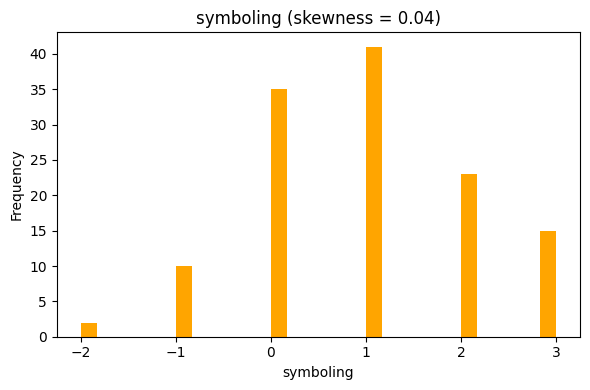

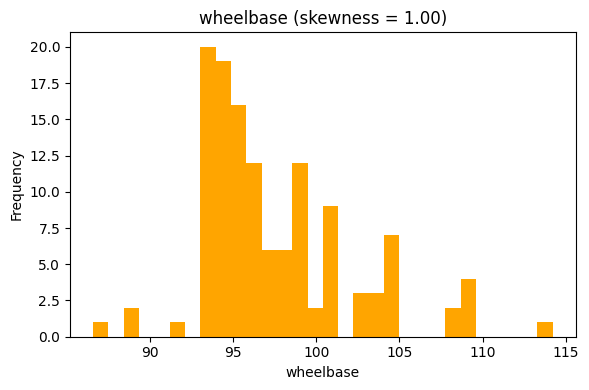

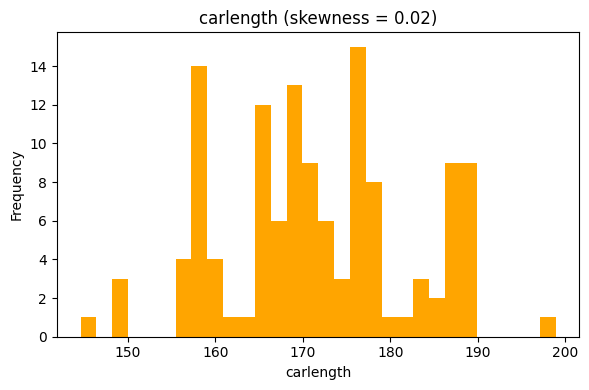

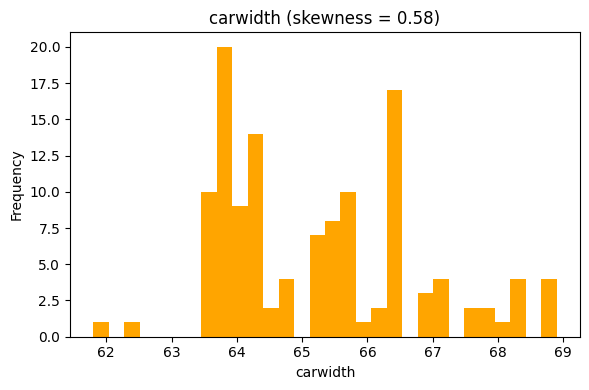

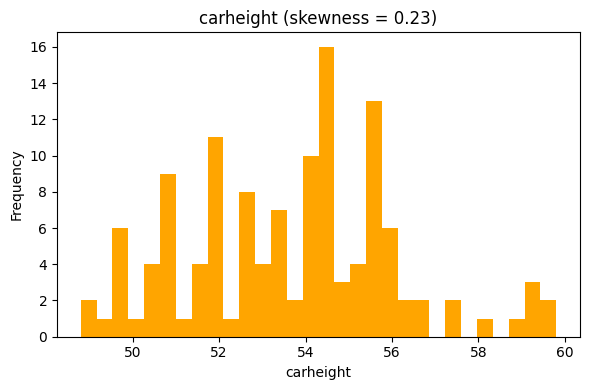

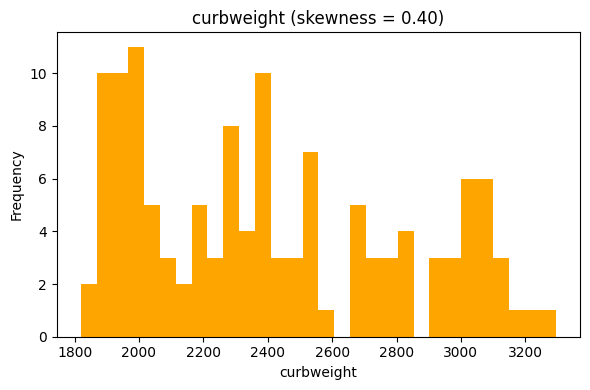

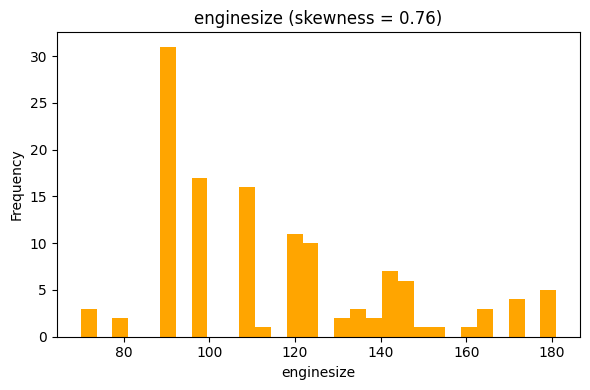

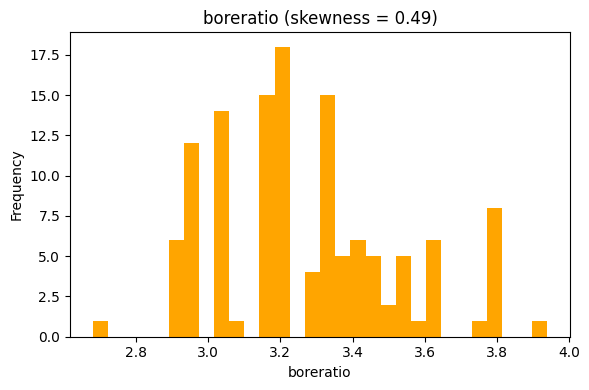

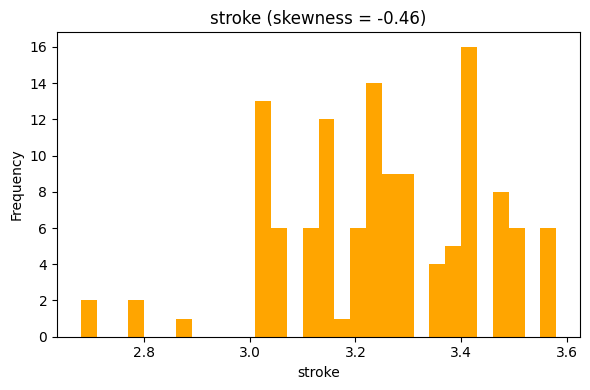

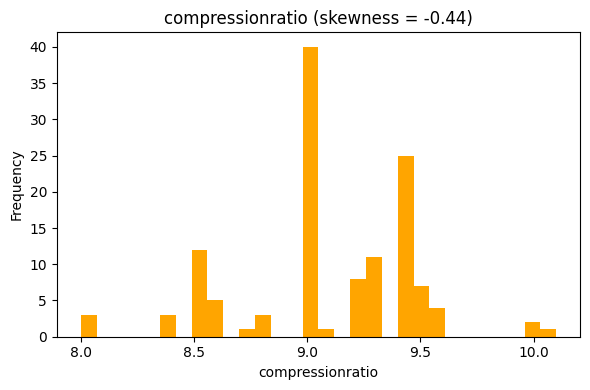

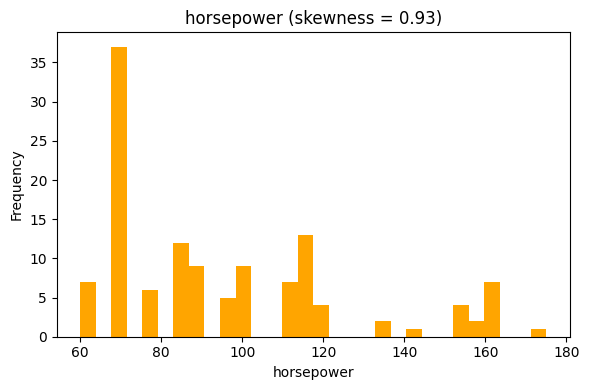

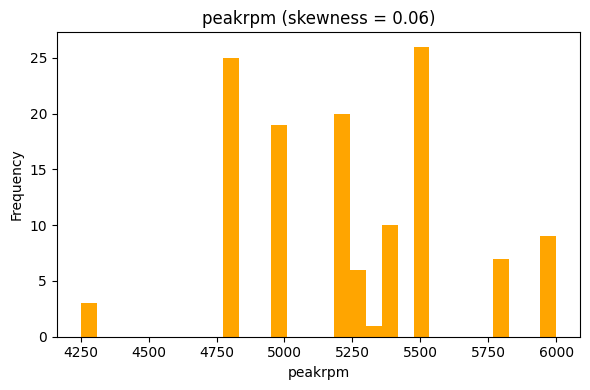

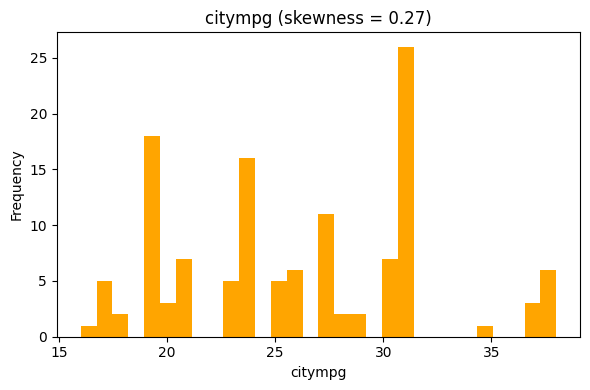

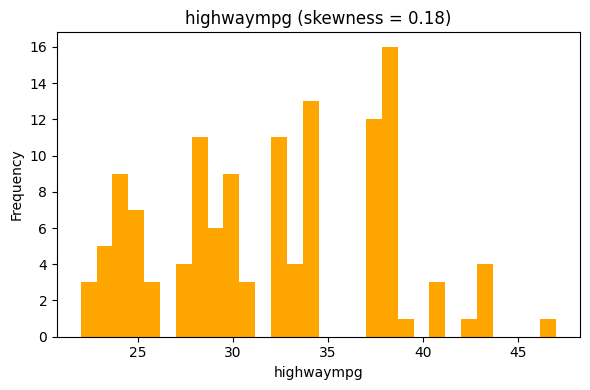

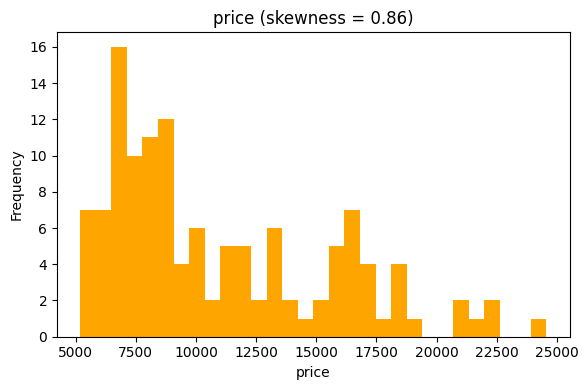

In [382]:
for col in num_cols:
    plt.figure(figsize=(6, 4))
    plt.hist(df[col], bins=30, color = 'orange')
    col_skew = skew(df[col])
    plt.title(f'{col} (skewness = {col_skew:.2f})')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


The skewness of the numerical columns is within an acceptable range, so no transformations were applied.

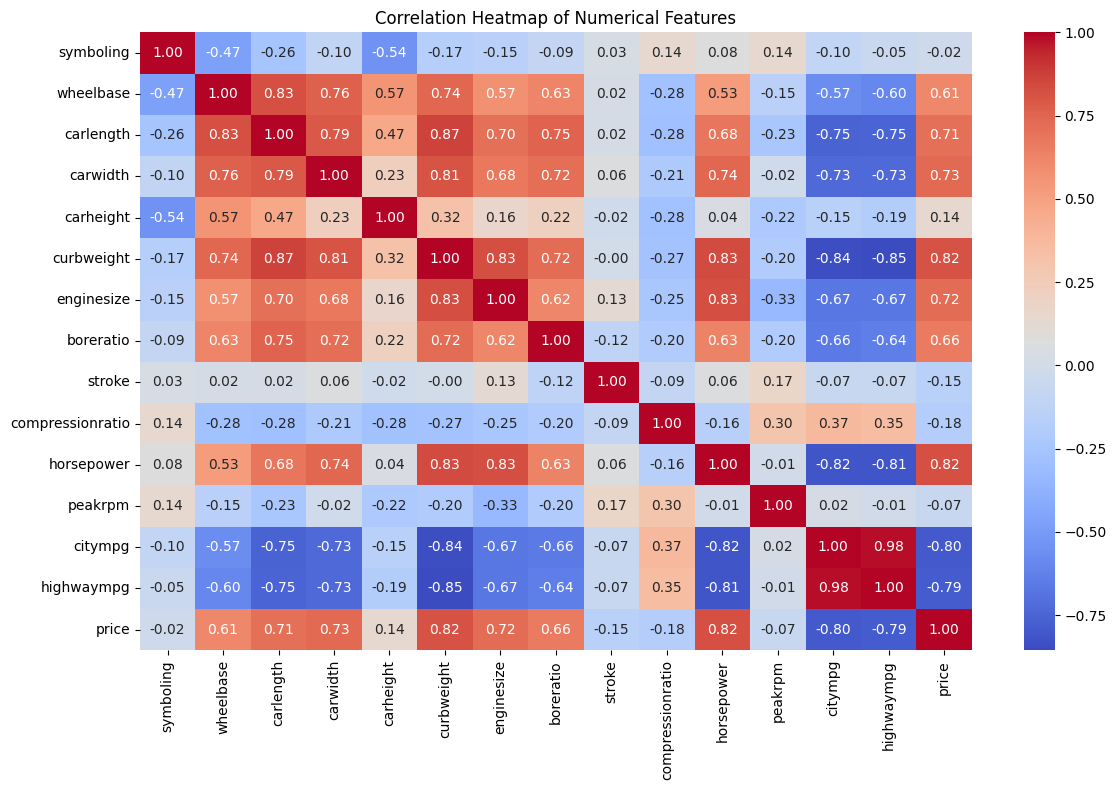

In [383]:
#to plot heatmap to check correlation amongst variables
corr = df[num_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr,
            annot=True,        #show correlation values in cells
            fmt=".2f",         #format for numbers
            cmap='coolwarm')   #color map
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

Price is strongly influenced by size (weight, width, length), engine power, and inversely by fuel efficiency (MPG).

In [384]:
#feature engineering:
#to create new feature: brand column (first word from CarName)
df['brand'] = df['CarName'].str.split().str[0]
df['brand'].unique().tolist()

['alfa-romero',
 'audi',
 'bmw',
 'chevrolet',
 'dodge',
 'honda',
 'isuzu',
 'mazda',
 'mercury',
 'mitsubishi',
 'nissan',
 'peugeot',
 'plymouth',
 'porsche',
 'saab',
 'toyota',
 'volkswagen',
 'volvo']

In [385]:
df['brand'].nunique()

18

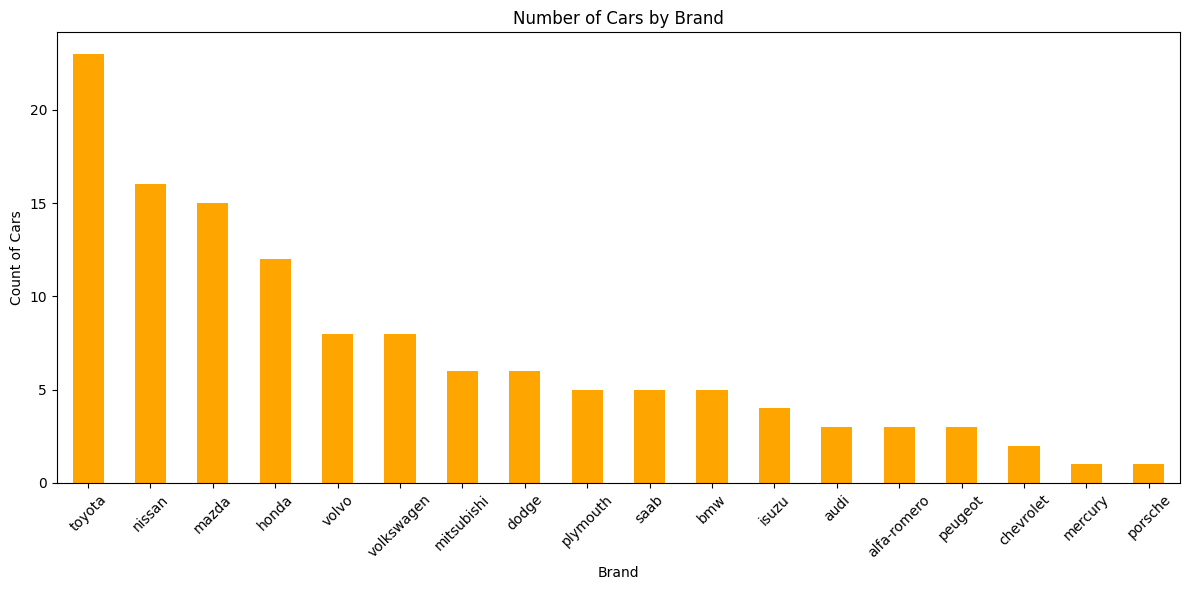

In [386]:
#plotting count of company names
#to get counts
brand_counts = df['brand'].value_counts()
plt.figure(figsize=(12, 6))
brand_counts.plot(kind='bar', color='orange')
plt.xlabel('Brand')
plt.ylabel('Count of Cars')
plt.title('Number of Cars by Brand')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* Toyota, Nissan, Mazda, and Honda have the highest counts → Japanese brands dominate the dataset.

* European and American brands: Volvo, Volkswagen, BMW, Mitsubishi, Dodge appear with moderate frequency.

* Luxury brands: Porsche, Mercury, Alfa-Romeo, Chevrolet have very few cars → these are rare in the data.

In [387]:
#one hot encoding
cat_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True, dtype=int)

In [388]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Columns: 142 entries, symboling to brand_volvo
dtypes: float64(8), int64(134)
memory usage: 139.9 KB


In [389]:
df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,brand_mercury,brand_mitsubishi,brand_nissan,brand_peugeot,brand_plymouth,brand_porsche,brand_saab,brand_toyota,brand_volkswagen,brand_volvo
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,0,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,0,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,0,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,0,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,0,0,0


In [390]:
X = df.drop('price', axis=1)   #all features
y = df['price']                #target

**Feature Importance Analysis**

In [391]:
selector = SelectKBest(score_func=f_classif, k=100) #to choose top 100 features
X_new = selector.fit_transform(X, y)

selected_mask = selector.get_support()
selected_features = X.columns[selected_mask]

print("Selected features by SelectKBest:")
print(selected_features)

#to keep only these features in a new DataFrame
X_kbest = X[selected_features]


Selected features by SelectKBest:
Index(['wheelbase', 'carwidth', 'curbweight', 'enginesize', 'compressionratio',
       'horsepower', 'citympg', 'highwaympg', 'CarName_audi 100 ls',
       'CarName_audi fox', 'CarName_bmw 320i', 'CarName_bmw x1',
       'CarName_bmw x3', 'CarName_bmw z4', 'CarName_chevrolet monte carlo',
       'CarName_chevrolet vega 2300', 'CarName_dodge challenger se',
       'CarName_honda accord', 'CarName_honda accord cvcc',
       'CarName_honda civic', 'CarName_honda civic (auto)',
       'CarName_honda civic 1300', 'CarName_honda civic cvcc',
       'CarName_isuzu mu-x', 'CarName_mazda glc', 'CarName_mazda glc 4',
       'CarName_mazda glc custom', 'CarName_mazda glc deluxe',
       'CarName_mazda rx-4', 'CarName_mazda rx-7 gs',
       'CarName_mazda rx2 coupe', 'CarName_mazda rx3',
       'CarName_mercury cougar', 'CarName_mitsubishi g4',
       'CarName_mitsubishi lancer', 'CarName_mitsubishi mirage',
       'CarName_mitsubishi montero', 'CarName_mitsubishi

To identify the variables that significantly affect car prices, feature selection was performed using SelectKBest. From the original 142 features, 100 features were selected based on their individual relationship with the target variable price. The selected features include:

Key numerical predictors

wheelbase, carwidth, curbweight, enginesize, compressionratio, horsepower, citympg, highwaympg
These variables also show strong correlations with price in the correlation heatmap, confirming that larger, heavier, and more powerful cars with lower mileage tend to be more expensive.

Important categorical indicators

Car specifications: aspiration_turbo, carbody_hardtop, drivewheel_fwd, drivewheel_rwd, enginetype_l, enginetype_ohc, enginetype_rotor, cylindernumber_two, fuelsystem_4bbl, fuelsystem_spfi

Brand-level dummies: brand_audi, brand_bmw, brand_chevrolet, brand_isuzu, brand_mercury, brand_mitsubishi, brand_nissan, brand_peugeot, brand_porsche, brand_saab, brand_toyota, brand_volvo

These results indicate that both technical specifications (size, weight, engine, mileage) and brand characteristics are significant drivers of car prices in the dataset.

**Model Implementation**

In [392]:
#to use only the selected 100 features
X = X_kbest
#to split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((100, 100), (26, 100), (100,), (26,))

In [393]:
#define models (scaling is done only for Linear Regression and SVR)
models = {
    "Linear Regression": Pipeline([('scaler', MinMaxScaler()), ('lr', LinearRegression())]),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": Pipeline([('scaler', MinMaxScaler()), ('svr', SVR())])
}

**Model Evaluation**

In [394]:
#to store results
results = []

#train, predict and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results.append([name, mae, mse, rmse, r2])

#create results dataframe
results_df = pd.DataFrame(results, columns=["Model", "MAE", "MSE", "RMSE", "R2"])
results_df = results_df.sort_values(by="R2", ascending=False).reset_index(drop=True)
print(results_df)

               Model          MAE           MSE         RMSE        R2
0      Decision Tree  1415.807692  4.035760e+06  2008.920103  0.759251
1      Random Forest  1418.905987  4.082125e+06  2020.426993  0.756485
2  Gradient Boosting  1378.146191  4.097461e+06  2024.218545  0.755570
3  Linear Regression  1673.989055  5.497176e+06  2344.605797  0.672072
4                SVR  3059.252427  1.682630e+07  4101.987592 -0.003755


Tree-based ensemble models (Random Forest, Gradient Boosting) are more reliable for this dataset.

Gradient Boosting achieved the lowest MAE (~1378) with an R² of about 0.76, followed closely by the Decision Tree and Random Forest.

Linear Regression showed higher error and lower R² (~0.67), indicating that the relationship between features and price is likely nonlinear.

SVR performed poorly on this dataset, with a near-zero R², and was not considered further.

**Hyperparameter Tuning**

In [395]:
#to tune hyperparameters for Gradient Boosting (learning_rate, n_estimators, max_depth) to further improve performance.

#to define the model
gbr = GradientBoostingRegressor(random_state=42)

#to define the hyperparameter grid
param_grid_2 = {
    'n_estimators': [100, 150],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'subsample': [0.8, 1.0]
}

#to set up GridSearchCV
grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    cv=5,            # 5-fold cross-validation
    n_jobs=-1,       # use all cores
    scoring='neg_mean_squared_error',
    verbose=2
)

#to fit the grid search
grid_search.fit(X_train, y_train)

#to get the best parameters
print("Best parameters:", grid_search.best_params_)
print("Best CV score (MSE):", -grid_search.best_score_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100, 'subsample': 0.8}
Best CV score (MSE): 3163556.2687663413


In [396]:
#to evaluate the tuned model
best_gbr = grid_search.best_estimator_
y_pred = best_gbr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R2: {r2}")



MAE: 1485.131840313946, MSE: 4618396.105006376, RMSE: 2149.0453938915243, R2: 0.724494475676259


After hyperparameter tuning using GridSearchCV (64 candidates, 5-fold CV), the best Gradient Boosting model was obtained with learning_rate = 0.1, n_estimators = 100, max_depth = 4, min_samples_split = 5, min_samples_leaf = 2, and subsample = 0.8.
The tuned model achieved a cross-validated MSE of approximately 3.16 × 10⁶.
However, on the test set, the tuned Gradient Boosting model obtained MAE = 1485.13, RMSE = 2149.05, and R² = 0.7245, which is slightly worse than the default Gradient Boosting configuration. This suggests that, for this particular train–test split, the untuned model provided marginally better test performance, even though the tuned model performed better during cross-validation.

In [397]:
model = best_gbr

#to get feature importances
importances = model.feature_importances_
feature_names = X.columns

feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feat_imp_df)


             Feature  Importance
5         horsepower    0.456330
7         highwaympg    0.256416
2         curbweight    0.092617
1           carwidth    0.062210
6            citympg    0.053018
..               ...         ...
87   fuelsystem_spfi    0.000000
90   brand_chevrolet    0.000000
93  brand_mitsubishi    0.000000
92     brand_mercury    0.000000
96     brand_porsche    0.000000

[100 rows x 2 columns]


In [399]:
feat_imp_df.head(25)

,Feature,Importance
5,horsepower,0.456330
7,highwaympg,0.256416
2,curbweight,0.092617
1,carwidth,0.062210
6,citympg,0.053018
0,wheelbase,0.016033
89,brand_bmw,0.012158
4,compressionratio,0.009764
79,carbody_hardtop,0.009621
3,enginesize,0.007506


Using the feature importance scores from the Gradient Boosting model, the most significant variables affecting car prices are horsepower, highwaympg, citympg, curbweight, carwidth, wheelbase, enginesize, and some brand/body-type variables (e.g., brand_bmw, carbody_hardtop). This indicates that engine power, fuel efficiency, vehicle size/weight, and brand positioning play the key roles in determining car prices.